<a href="https://colab.research.google.com/github/anujaprasads/anujashajan/blob/main/inceptionv3withoutcrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/movingvehicletrain/train'
valid_path = '/content/drive/MyDrive/preprocessingframes/surfoutput61/surfoutput6'

In [ ]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/movingvehicletrain/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/movingvehicletrain/train',
                                                 target_size = (224, 224),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 1348 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/preprocessingframes/surfoutput61/surfoutput6',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 626 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
270/270 [==============================] - 429s 1s/step - loss: 6.0348 - accuracy: 0.6371 - val_loss: 22.9376 - val_accuracy: 0.2668
Epoch 2/50
270/270 [==============================] - 29s 106ms/step - loss: 1.9883 - accuracy: 0.8739 - val_loss: 57.4323 - val_accuracy: 0.0895
Epoch 3/50
270/270 [==============================] - 29s 106ms/step - loss: 1.4088 - accuracy: 0.9159 - val_loss: 46.7488 - val_accuracy: 0.1406
Epoch 4/50
270/270 [==============================] - 28s 106ms/step - loss: 1.3515 - accuracy: 0.9338 - val_loss: 41.7015 - val_accuracy: 0.1470
Epoch 5/50
270/270 [==============================] - 28s 105ms/step - loss: 1.2772 - accuracy: 0.9288 - val_loss: 44.7475 - val_accuracy: 0.1869
Epoch 6/50
270/270 [==============================] - 28s 105ms/step - loss: 1.7761 - accuracy: 0.9316 - val_loss: 59.0309 - val_accuracy: 0.1038
Epoch 7/50
270/270 [==============================] - 28s 104ms/step - loss: 0.9527 - accuracy: 0.9543 - val_loss: 100.8430 - 

In [ ]:
import matplotlib.pyplot as plt

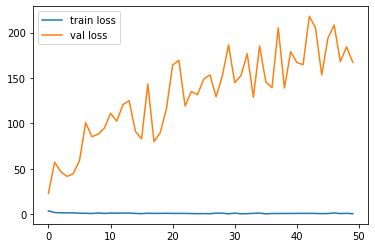

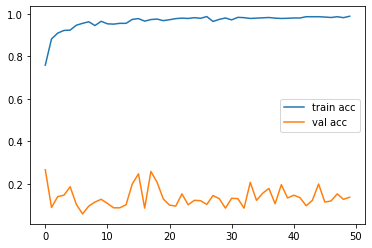

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/movingvehicletrain/model_inceptionwithnv.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/movingvehicletrain/model_inceptionwithnv.h5')

In [ ]:

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2410281e-27,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.9234184e-06, 0.0000000e+00,
        9.9999702e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0336517e-12, 0.0000000e+00,
        1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [4.2398975e-13, 9.8379139e-22, 1.8745172e-19, 1.0000000e+00,
        1.5540617e-23],
       [0.0000000e+00, 0.0000000e+00, 3.8734627e-30, 2.7980786e-33,
        1.0000000e+00]], dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([2, 4, 4, 1, 2, 1, 1, 4, 1, 1, 1, 3, 2, 1, 4, 4, 1, 2, 0, 4, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 4, 4, 3, 3, 1, 0, 4, 0, 2, 4, 4, 2, 1, 1, 4,
       3, 4, 3, 0, 4, 4, 3, 4, 4, 4, 1, 4, 4, 1, 4, 2, 3, 1, 3, 2, 4, 0,
       1, 0, 4, 1, 2, 4, 4, 1, 4, 1, 1, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 1, 4, 2, 4, 0, 4, 0, 1, 4, 1, 4, 1, 1, 4, 1, 2, 2, 0,
       2, 1, 0, 2, 4, 0, 4, 3, 4, 1, 4, 0, 2, 1, 1, 4, 4, 3, 0, 3, 0, 4,
       4, 3, 1, 3, 0, 0, 2, 3, 4, 2, 4, 3, 4, 0, 4, 1, 0, 1, 1, 4, 4, 0,
       1, 0, 4, 0, 1, 2, 1, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 4, 1, 4, 0, 2,
       1, 1, 0, 3, 1, 1, 3, 4, 1, 2, 2, 4, 2, 3, 0, 1, 2, 2, 1, 4, 0, 1,
       2, 4, 0, 4, 1, 1, 4, 0, 4, 0, 4, 3, 4, 4, 4, 4, 3, 2, 4, 4, 0, 1,
       2, 1, 1, 1, 4, 1, 0, 3, 4, 1, 1, 2, 2, 4, 3, 0, 0, 4, 1, 0, 3, 4,
       2, 4, 3, 0, 4, 2, 0, 4, 1, 2, 2, 2, 4, 0, 2, 4, 1, 1, 4, 3, 2, 0,
       4, 1, 4, 2, 1, 1, 1, 0, 4, 1, 4, 1, 4, 0, 4, 1, 1, 4, 0, 1, 1, 2,
       4, 0, 1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 2, 2, 2,